In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mez_freq = np.load("../Data/MobMat_freq_mezuro.npy")
mez_inc = np.load("../Data/MobMat_inc_mezuro.npy")
df = pd.read_csv("../Data/Mob_grav_freq.csv")
grav_freq = pd.read_csv("../Data/Mob_grav_freq.csv").drop("Unnamed: 0",axis=1).to_numpy()
grav_inc = pd.read_csv("../Data/Mob_grav_inc.csv").drop("Unnamed: 0",axis=1).to_numpy()
# grav 2!
grav2_freq = pd.read_csv("../Data/General/Mob_grav_freq.csv").drop("Unnamed: 0",axis=1).to_numpy()
grav2_inc = pd.read_csv("../Data/General/Mob_grav_inc.csv").drop("Unnamed: 0",axis=1).to_numpy()

In [8]:
print(mez_freq.shape)
print(grav_inc.shape)
print(grav2_inc.shape)
print(df)

(380, 380)
(380, 380)
(380, 380)
           Unnamed: 0  's-Gravenhage  's-Hertogenbosch  Aa en Hunze   Aalburg  \
0       's-Gravenhage            NaN         12.111327     0.858039  1.988618   
1    's-Hertogenbosch      12.111327               NaN     0.335028  0.553863   
2         Aa en Hunze       0.858039          0.335028          NaN  0.023206   
3             Aalburg       1.988618          0.553863     0.023206       NaN   
4            Aalsmeer       5.819463          0.951282     0.062249  0.118842   
..                ...            ...               ...          ...       ...   
375           Zundert       2.772551          0.748250     0.035032  0.206096   
376           Zutphen       2.141346          1.204445     0.193443  0.066195   
377   Zwartewaterland       1.044056          0.477508     0.127898  0.029745   
378       Zwijndrecht      10.314457          1.454643     0.075890  0.469651   
379            Zwolle       5.821290          2.773411     0.702303  0.16858

C:\Users\0915564\AppData\Local\Temp\ipykernel_20220\2633848195.py:14: RuntimeWarning: divide by zero encountered in divide
  hist_divided = hist1 / hist2
C:\Users\0915564\AppData\Local\Temp\ipykernel_20220\2633848195.py:14: RuntimeWarning: invalid value encountered in divide
  hist_divided = hist1 / hist2
C:\Users\0915564\AppData\Local\Temp\ipykernel_20220\2633848195.py:42: RuntimeWarning: divide by zero encountered in divide
  hist_divided = hist1 / hist2
C:\Users\0915564\AppData\Local\Temp\ipykernel_20220\2633848195.py:42: RuntimeWarning: invalid value encountered in divide
  hist_divided = hist1 / hist2
C:\Users\0915564\AppData\Local\Temp\ipykernel_20220\2633848195.py:70: RuntimeWarning: invalid value encountered in divide
  hist_divided = hist1 / hist2


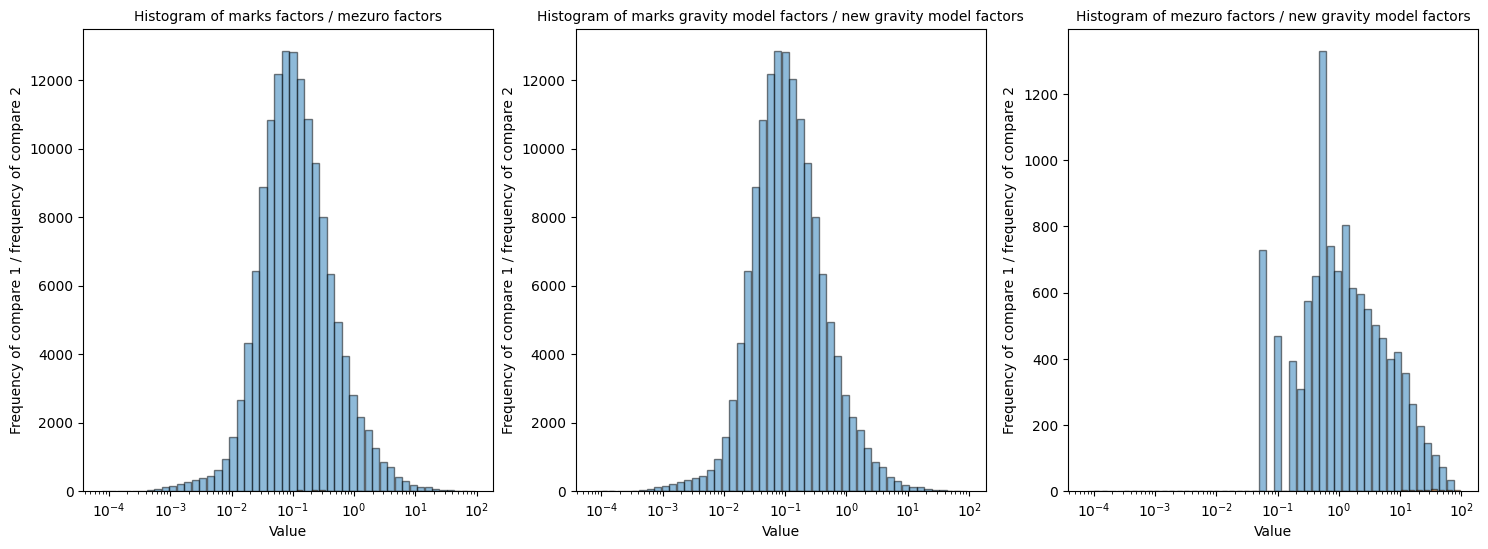

In [75]:
compare1 = grav_freq.flatten()
compare2 = mez_freq.flatten()
compare1 = compare1[np.isfinite(compare1)]
compare2 = compare2[np.isfinite(compare2)]

bins = np.logspace(-4, 2)
hist1, bin_edges = np.histogram(compare1, bins=bins)
hist2, _ = np.histogram(compare2, bins=bins)

# # Avoid division by zero
# hist2_non_zero = np.where(hist2 == 0, 1, hist2)

# Divide the values in the bins of hist1 by the values in hist2
hist_divided = hist1 / hist2

# Plot the original histogram
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
width = np.diff(bin_edges) * 0.72  # Reduce width to avoid overlap

# Plot hist1 with some offset to the left
ax[0].bar(bin_edges[:-1] - width/2, hist1, width=width, edgecolor='black', alpha=0.5, label='Original Histogram')

# Plot hist_divided with some offset to the right
ax[0].bar(bin_edges[:-1] + width/2, hist_divided, width=width, edgecolor='black', alpha=0.5, label='Divided Histogram')

ax[0].set_xlabel('Value')
ax[0].set_ylabel('Frequency of compare 1 / frequency of compare 2')
ax[0].set_title('Histogram of marks factors / mezuro factors', fontsize=10)
ax[0].set_xscale("log")


compare1 = grav_freq.flatten()
compare2 = grav2_freq.flatten()
compare1 = compare1[np.isfinite(compare1)]
compare2 = compare2[np.isfinite(compare2)]

bins = np.logspace(-4, 2)
hist1, bin_edges = np.histogram(compare1, bins=bins)
hist2, _ = np.histogram(compare2, bins=bins)

# Divide the values in the bins of hist1 by the values in hist2
hist_divided = hist1 / hist2

# Plot the original histogram
width = np.diff(bin_edges) * 0.72  # Reduce width to avoid overlap

# Plot hist1 with some offset to the left
ax[1].bar(bin_edges[:-1] - width/2, hist1, width=width, edgecolor='black', alpha=0.5, label='Original Histogram')

# Plot hist_divided with some offset to the right
ax[1].bar(bin_edges[:-1] + width/2, hist_divided, width=width, edgecolor='black', alpha=0.5, label='Divided Histogram')

ax[1].set_xlabel('Value')
ax[1].set_ylabel('Frequency of compare 1 / frequency of compare 2')
ax[1].set_title('Histogram of marks gravity model factors / new gravity model factors', fontsize=10)
ax[1].set_xscale("log")



compare1 = mez_freq.flatten()
compare2 = grav2_freq.flatten()
compare1 = compare1[np.isfinite(compare1)]
compare2 = compare2[np.isfinite(compare2)]

bins = np.logspace(-4, 2)
hist1, bin_edges = np.histogram(compare1, bins=bins)
hist2, _ = np.histogram(compare2, bins=bins)

# Divide the values in the bins of hist1 by the values in hist2
hist_divided = hist1 / hist2

# Plot the original histogram
width = np.diff(bin_edges) * 0.72  # Reduce width to avoid overlap

# Plot hist1 with some offset to the left
ax[2].bar(bin_edges[:-1] - width/2, hist1, width=width, edgecolor='black', alpha=0.5, label='Original Histogram')

# Plot hist_divided with some offset to the right
ax[2].bar(bin_edges[:-1] + width/2, hist_divided, width=width, edgecolor='black', alpha=0.5, label='Divided Histogram')

ax[2].set_xlabel('Value')
ax[2].set_ylabel('Frequency of compare 1 / frequency of compare 2')
ax[2].set_title('Histogram of mezuro factors / new gravity model factors', fontsize=10)
ax[2].set_xscale("log")
plt.show()

C:\Users\0915564\AppData\Local\Temp\ipykernel_20220\701604881.py:14: RuntimeWarning: divide by zero encountered in divide
  hist_divided = hist1 / hist2
C:\Users\0915564\AppData\Local\Temp\ipykernel_20220\701604881.py:14: RuntimeWarning: invalid value encountered in divide
  hist_divided = hist1 / hist2


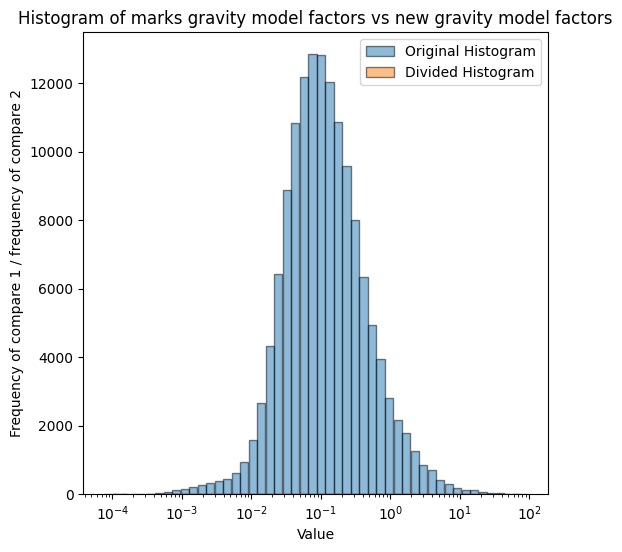

In [62]:
compare1 = grav_freq.flatten()
compare2 = grav2_freq.flatten()
compare1 = compare1[np.isfinite(compare1)]
compare2 = compare2[np.isfinite(compare2)]

bins = np.logspace(-4, 2)
hist1, bin_edges = np.histogram(compare1, bins=bins)
hist2, _ = np.histogram(compare2, bins=bins)

# # Avoid division by zero
# hist2_non_zero = np.where(hist2 == 0, 1, hist2)

# Divide the values in the bins of hist1 by the values in hist2
hist_divided = hist1 / hist2

# Plot the original histogram
plt.figure(figsize=(6, 6))
width = np.diff(bin_edges) * 0.72  # Reduce width to avoid overlap

# Plot hist1 with some offset to the left
plt.bar(bin_edges[:-1] - width/2, hist1, width=width, edgecolor='black', alpha=0.5, label='Original Histogram')

# Plot hist_divided with some offset to the right
plt.bar(bin_edges[:-1] + width/2, hist_divided, width=width, edgecolor='black', alpha=0.5, label='Divided Histogram')

plt.xlabel('Value')
plt.ylabel('Frequency of compare 1 / frequency of compare 2')
plt.title('Histogram of marks gravity model factors vs new gravity model factors')
plt.legend()
plt.xscale("log")
plt.show()

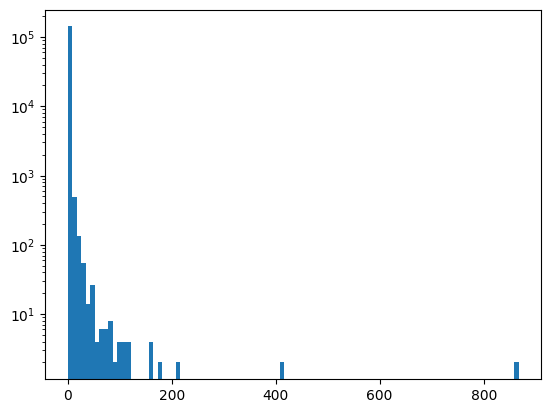

In [31]:
plt.hist(compare1.flatten(), bins=100)
plt.yscale("log")

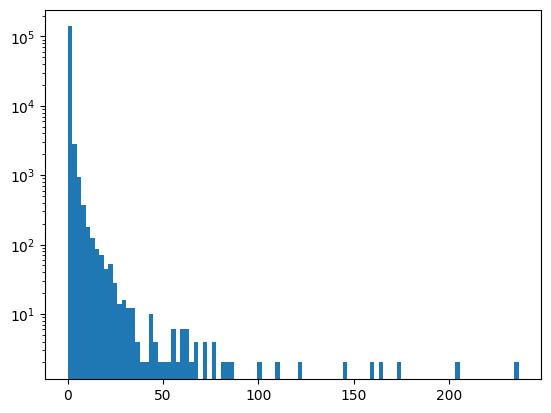

In [32]:
plt.hist(compare2.flatten(), bins=100)
plt.yscale("log")